In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/Spam Email Detection - spam.csv')

In [ ]:
data.info()
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)
data.shape
data.sample(2)
data.rename(columns={'v1':'Target','v2':'Mail-Text'},inplace=True)
data.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,Target,Mail-Text
4706,ham,Wif my family booking tour package.
1371,ham,I though we shd go out n have some fun so bar ...


In [ ]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])
data.tail(2)


data.isna().sum()


data.duplicated().sum()


data = data.drop_duplicates(keep = 'first')
data.duplicated().sum()
data.shape
data.sample(4)

,Target,Mail-Text
378,0,Keep my payasam there if rinu brings
4611,0,Sorry da. I gone mad so many pending works wha...
5567,1,This is the 2nd time we have tried 2 contact u...
1522,0,I thk u dun haf 2 hint in e forum already lor....


In [ ]:

data.shape

if any(col in data.columns for col in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]):
    data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

if any(col in data.columns for col in ['v1', 'v2']):
    data.rename(columns={'v1': 'result', 'v2': 'emails'}, inplace=True)
else:

    data.rename(columns={'Target': 'result', 'Mail-Text': 'emails'}, inplace=True)

data
data.isnull().sum()
data.duplicated().sum()
data = data.drop_duplicates(keep='first')
data.shape
data.head(5)

,result,emails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
## 2. Data Visualization

data['result'].value_counts()
data.rename(columns={'result':'Type'},inplace=True)
data['Type'].value_counts()

,count
Type,
0,4516
1,647


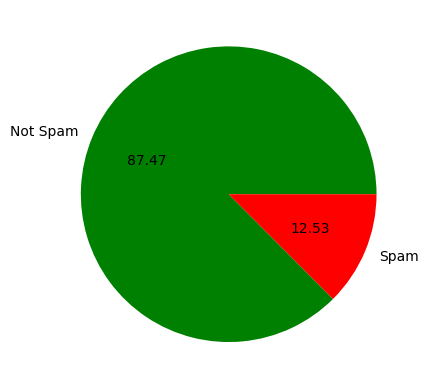

In [ ]:
# pie chart
import matplotlib.pyplot as plt
plt.pie(data['Type'].value_counts(),labels=['Not Spam','Spam'],autopct="%0.2f",colors="green")
plt.show()

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

data['num_characters'] = data['emails'].apply(len)
data.rename(columns={'num_characters':'Character Count'},inplace=True)
data.head(3)
data['emails'].apply(lambda x:nltk.word_tokenize(x))
data['emails'].apply(lambda x:len(nltk.word_tokenize(x)))
data['Word Count'] = data['emails'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head(4)
data['Sentence Count']=data['emails'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.tail(4)
data.describe()

data[data['Type'] == 0][['Character Count','Word Count','Sentence Count']].describe()


data[data['Type'] == 1][['Character Count','Word Count','Sentence Count']].describe()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Character Count,Word Count,Sentence Count
count,647.000000,647.000000,647.000000
mean,137.318393,27.659969,2.967543
std,30.096861,7.038065,1.490069
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='Character Count', ylabel='Count'>

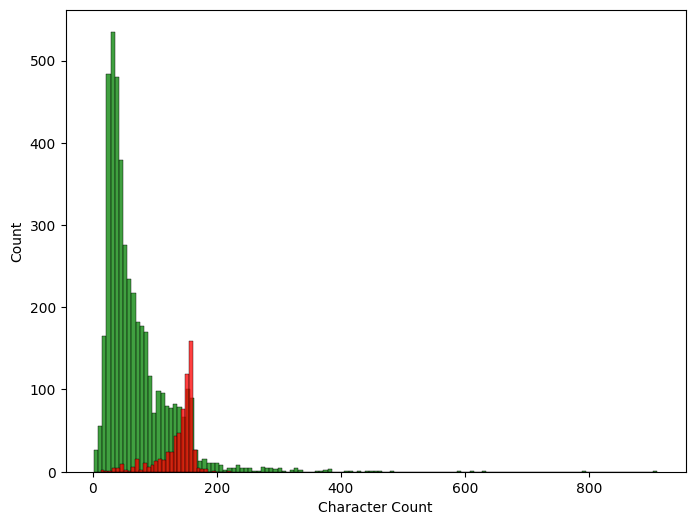

In [ ]:

import seaborn as sns

## Histogram plot
plt.figure(figsize=(8,6))
sns.histplot(data[data['Type']==0]['Character Count'],color = 'green')
sns.histplot(data[data['Type']==1]['Character Count'],color = 'red')

<Axes: xlabel='Character Count', ylabel='Count'>

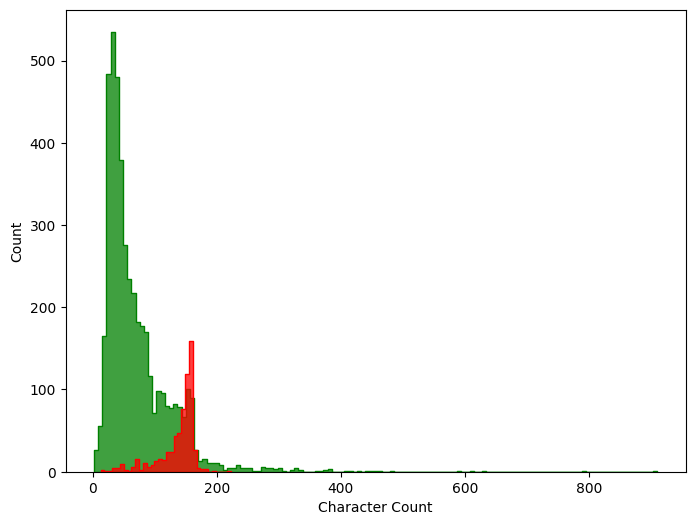

In [ ]:
## Histogram plot using 'element=step' for visual separation
plt.figure(figsize=(8,6))
sns.histplot(data[data['Type']==0]['Character Count'],color = 'green', element='step')
sns.histplot(data[data['Type']==1]['Character Count'],color = 'red', element='step')

<Axes: xlabel='Word Count', ylabel='Count'>

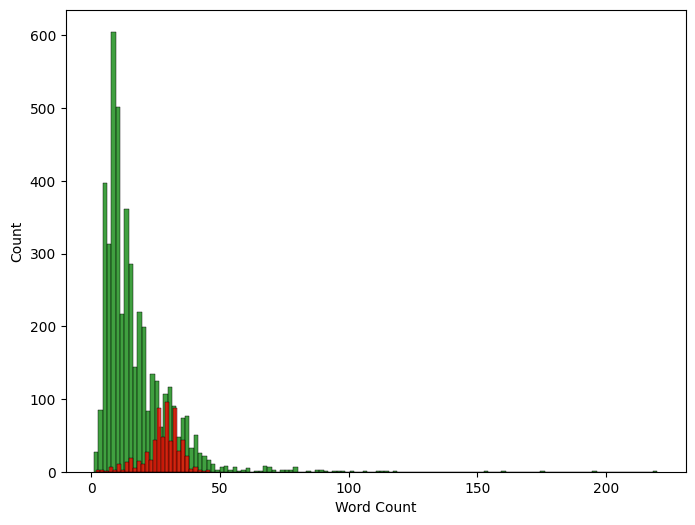

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data[data['Type']==0]['Word Count'],color = 'green')
sns.histplot(data[data['Type']==1]['Word Count'],color = 'red')

<Axes: >

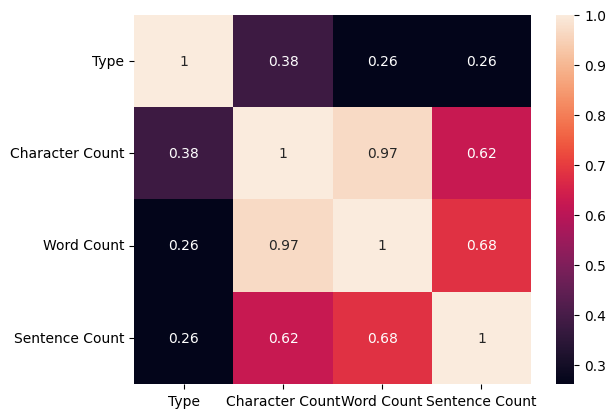

In [ ]:
columns_to_select = ['Type', 'Character Count', 'Word Count', 'Sentence Count']
numeric_data = data[columns_to_select]

## Heat map plot
sns.heatmap(numeric_data.corr(),annot=True)

<ipython-input-42-26e28c4f4eaf>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=data_frame, palette='viridis')


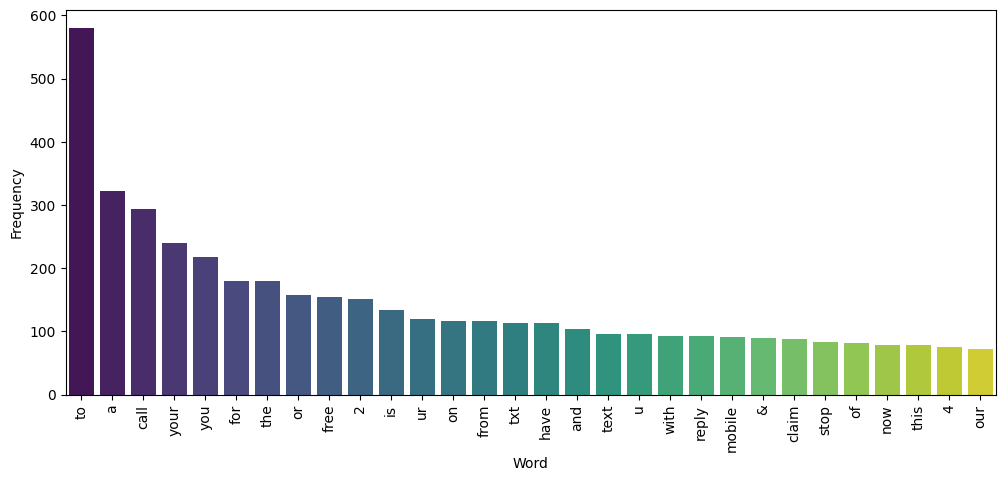

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter




data['emails'] = data['emails'].str.lower()


spam_word = []
for msg in data[data['Type'] == 1]['emails'].tolist():
    for word in msg.split():
        spam_word.append(word)

len(spam_word)
Counter(spam_word)
pd.DataFrame(Counter(spam_word).most_common(30))
data_frame = pd.DataFrame(Counter(spam_word).most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='Frequency', data=data_frame, palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-22-e0a41dd7e9f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=data_frame, palette='viridis')


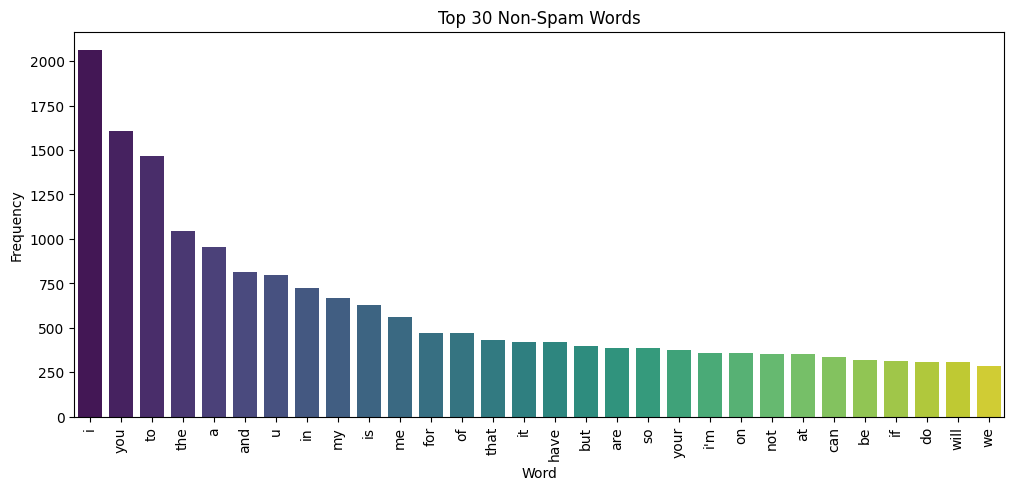

In [ ]:
non_spam_word = []
for msg in data[data['Type']==0]['emails'].tolist(): # Replace 'Transformed-Text' with 'emails'
    for word in msg.split():
        non_spam_word.append(word)
len(non_spam_word)
data_frame = pd.DataFrame(Counter(non_spam_word).most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='Frequency', data=data_frame, palette='viridis')
plt.title('Top 30 Non-Spam Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
data.head()

,Type,emails,Character Count,Word Count,Sentence Count
0,0,"go until jurong point, crazy.. available only ...",111,24,2
1,0,ok lar... joking wif u oni...,29,8,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
lr = LogisticRegression(solver='liblinear', penalty='l1')
sv = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dct = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
ab = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gb = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
# Initialize and train the models
models = {
    'Logistic Regression': lr,
    'SVC': sv,
    'MultinomialNB': mnb,
    'DecisionTreeClassifier': dct,
    'KNN': knn,
    'RF': rf,
    'AdaBoost': ab,
    'Bagging': bc,
    'Extra Tree': etc,
    'GradientBoosting': gb,
    'XGBoost': xgb
}


In [ ]:
def train_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score


X = data[['Character Count', 'Word Count', 'Sentence Count']]
y = data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_classifier(lr, X_train, X_test, y_train, y_test)

(0.9341723136495643, 0.8)

In [ ]:

accuracy_scores = []
precision_scores = []
for name, model in models.items():
    current_accuracy, current_precision = train_classifier(model, X_train, X_test, y_train, y_test)

    print("For",name)
    print("Accuracy:",current_accuracy)
    print("Precision:",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

result_df = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending = False)

For Logistic Regression
Accuracy: 0.9341723136495643
Precision: 0.8
For SVC
Accuracy: 0.8877057115198451
Precision: 0.0
For MultinomialNB
Accuracy: 0.8867376573088093
Precision: 0.3333333333333333
For DecisionTreeClassifier
Accuracy: 0.9419167473378509
Precision: 0.7692307692307693


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For KNN
Accuracy: 0.9341723136495643
Precision: 0.7181818181818181
For RF
Accuracy: 0.9390125847047435
Precision: 0.7476635514018691
For AdaBoost
Accuracy: 0.9390125847047435
Precision: 0.7676767676767676
For Bagging
Accuracy: 0.9370764762826719
Precision: 0.7383177570093458
For Extra Tree
Accuracy: 0.9303000968054211
Precision: 0.6896551724137931
For GradientBoosting
Accuracy: 0.9457889641819942
Precision: 0.8333333333333334
For XGBoost
Accuracy: 0.9486931268151017
Precision: 0.8118811881188119


In [ ]:
result_df1 = pd.melt(result_df,id_vars = "Algorithm")
result_df1

,Algorithm,variable,value
0,GradientBoosting,Accuracy,0.945789
1,XGBoost,Accuracy,0.948693
2,Logistic Regression,Accuracy,0.934172
3,DecisionTreeClassifier,Accuracy,0.941917
4,AdaBoost,Accuracy,0.939013
5,RF,Accuracy,0.939013
6,Bagging,Accuracy,0.937076
7,KNN,Accuracy,0.934172
8,Extra Tree,Accuracy,0.930300
9,MultinomialNB,Accuracy,0.886738


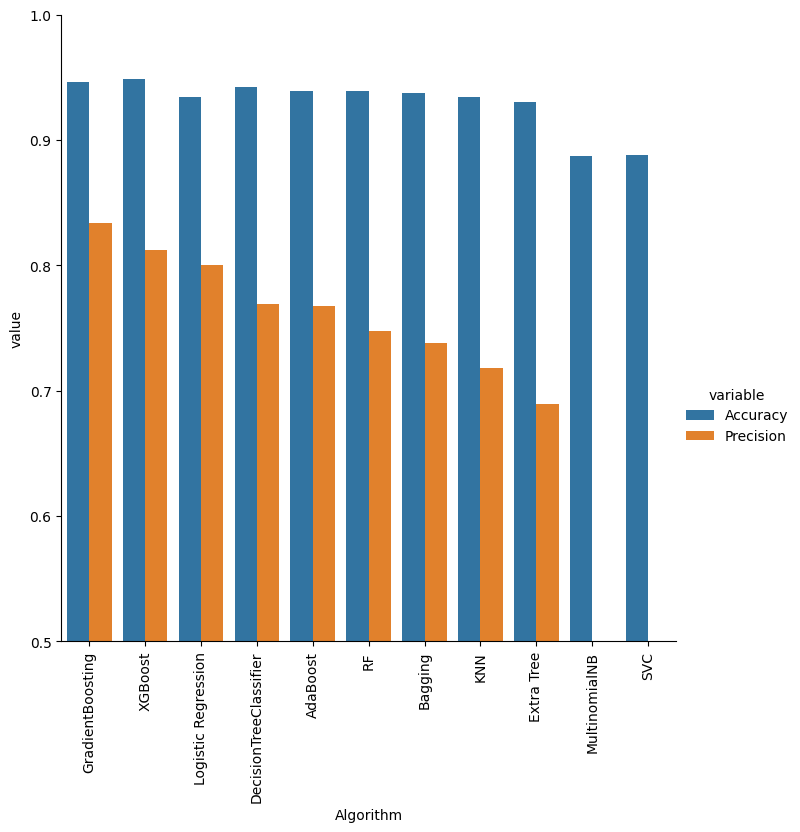

In [ ]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=result_df1, kind='bar', height=7)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()